# What are the safest neighbourhoods in Washington DC?

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
dc_crime_data = pd.read_csv('dc_crime_add_vars.csv')

# Describe the Data

## Where does it come from? What does your data contain and what is its background? 

This data from the metropolitan police department website contains 342,867 reports of crime spanning from 2007-2017 in the DC metro area.  Looking at this data we can see how much crime is being committed, where/when it is being committed, and how serious of a crime it is.  The crimes range from Theft, Arson, Assault, Homicide, Sex Abuse, Robbery, and Burglary.  The location of the crime is identified by clusters.  A cluster is a group of several adjacent neighbourhoods.  

What this data does not include is population data.  This means we can predict the likelihood of a crime being committed in a specific area, but we cannot predict the likelihood that a person will experience a crime in a specific area.  


## Why is it interesting or significant? 

This dataset is of personal interest to me because of a friend who has decided to move to Washington DC.  Because the neighborhood and date  is included for each occurrence of the crime we can determine which areas are becoming safer and which areas are becoming more dangerous places to live in Washington DC.  

Without the population data, we cannot predict the likeliness that someone will experience a crime.  Areas with fewer people are expected to have fewer crimes.  Areas with more people are expected to have more crimes.   However, we also have the types of crime being committed.  Meaning, for each area we can determine what percentage of the crime is violent and what percentage is non-violent.  This should provide some insight who which areas of Washington DC are more dangerous than others.  Areas with a high percentage of crime that is violent would be considered dangerous.  Areas with a low percentage of violent crime would be considered safe.  


## Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

To make the data easier to work with, we can rename columns and drop columns that we do not need. 

In [9]:
dc_crime_data.drop(columns=['Unnamed: 0','X','REPORT_DAT','START_DATE','END_DATE', 'minute','second', 'CCN','BLOCK','WARD','optional', 'ANC','BLOCK_GROUP','CENSUS_TRACT'], inplace = True)
dc_crime_data.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster"}, inplace=True)

The neighbourhood clusters are 1 through 39.  However, there are some NaN values.  Because there is no cluster 0, we can replace NaN with 0 to indiciate the cluster is unknow.

The value in the cluster data contains the word "cluster" follwed by the actual cluster number.  We can remove the word "cluster" from the data and convert the type to an int so the values can be sorted 0-39. 

In [10]:
dc_crime_data['cluster'].fillna(0, inplace=True)
dc_crime_data['cluster'] = dc_crime_data['cluster'].astype(str)
dc_crime_data['cluster'] = dc_crime_data['cluster'].apply(lambda cluster: cluster.replace("Cluster",""))
dc_crime_data['cluster'] = pd.to_numeric(dc_crime_data['cluster'])

The crimetype value will indicate if a crime was violent or non-violent.  Because we want to compare the number of violent crimes to the number of non-violent crimes, it will be easier if we create sperate boolean columns for violent and for non-violent crimes. We can also create a count value for convience

In [11]:
dc_crime_data['count'] = 1
dc_crime_data['violent'] = 0
dc_crime_data['non_violent'] = 0

dc_crime_data.loc[dc_crime_data.crimetype == "Non-Violent", "non_violent"] = 1
dc_crime_data.loc[dc_crime_data.crimetype == "Violent", "violent"] = 1

### All crime by year 

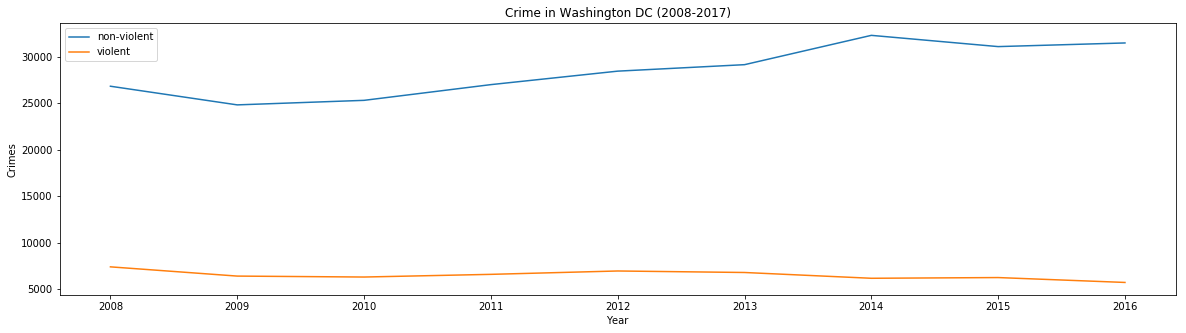

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861


In [30]:
years = dc_crime_data.groupby(['year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
years['pct_violent'] = years['violent'] / years['count']
years.reset_index(inplace=True)

plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.title("Crime in Washington DC (2008-2017)")
plt.legend()
plt.show()
years

The data suggest a dramatic decrease in crime from 2016 to 2017.  Because the data ends in 2017, it seems possible the data only includes 2017 up until the time the data was collected. If data has not been collected for the entire year of 2017 this would explain the dramatic dropoff in number of crimes.

In [13]:
pd.to_datetime(dc_crime_data[dc_crime_data['year'] == 2017]['date']).sort_values(ascending=False).head(5)

189912   2017-11-03 00:26:42
139931   2017-11-02 23:43:34
341995   2017-11-02 23:28:47
38286    2017-11-02 23:09:39
251999   2017-11-02 23:03:53
Name: date, dtype: datetime64[ns]

After filtering the data for 2017 and sorting by the date, the last 5 records show there are no records after November 3, 2017.  It would be reasonable to assume the 2017 data is missing after this date.

With two months missing from the 2017 data, 2017 cannont be compared to the other years, and will be removed for the remainder of this analysis when comparing data from year to year.  

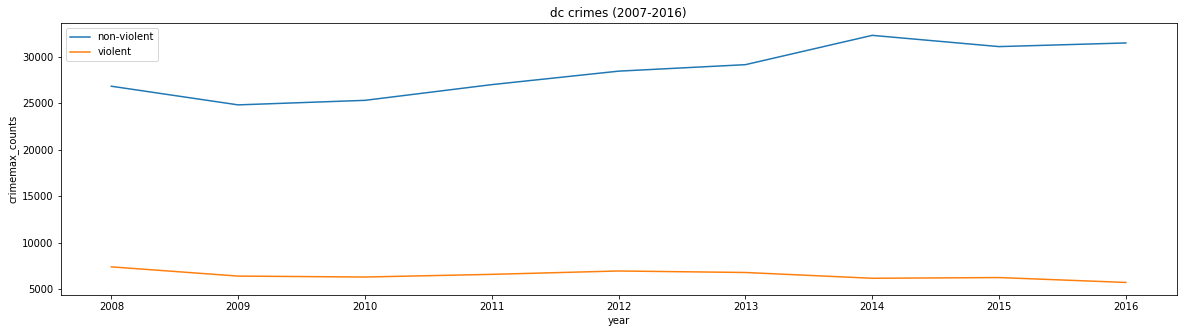

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861


In [14]:
dc_crime_data.drop(dc_crime_data[dc_crime_data.year == 2017].index, inplace=True)
years.drop(years[years.year == 2017].index, inplace=True)

plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('year')
plt.ylabel('crimemax_counts')
plt.title("dc crimes (2008-2016)")
plt.legend()
plt.show()
years

Removing 2017 from the data results in the above graph which now accuratly desribes the changes in crime from year to year

### Crime by quadrant location

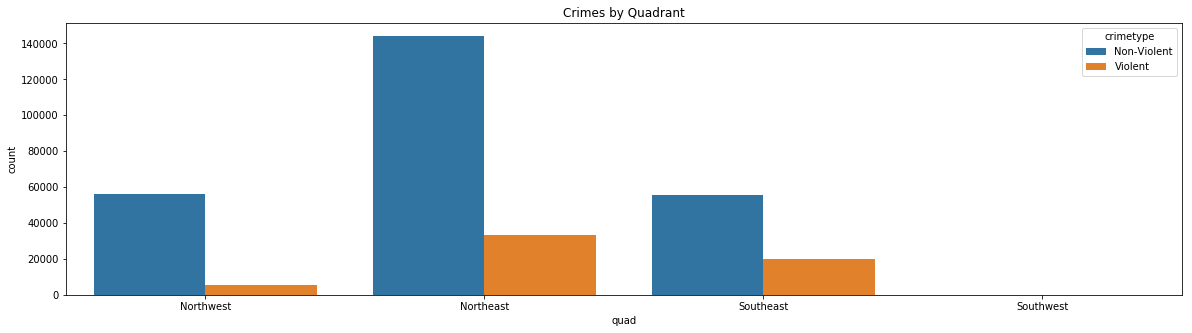

Northeast    177674
Southeast     75438
Northwest     61715
Southwest        13
Name: quad, dtype: int64

In [15]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Quadrant")
sns.countplot(x='quad',data=dc_crime_data, hue='crimetype')
plt.show()
dc_crime_data['quad'].value_counts()

The distribution of crimes by quadrant shows a majority of crimes occured in the Northeast while practically zero crimes occured in the Southwest.  While population is not represented in the data, it seems likely there is no population in the Southwest.  Looking at a map confirms this suspicion showing very little land in the Southwest quadrent of Washington DC.

### Crime by type of offense

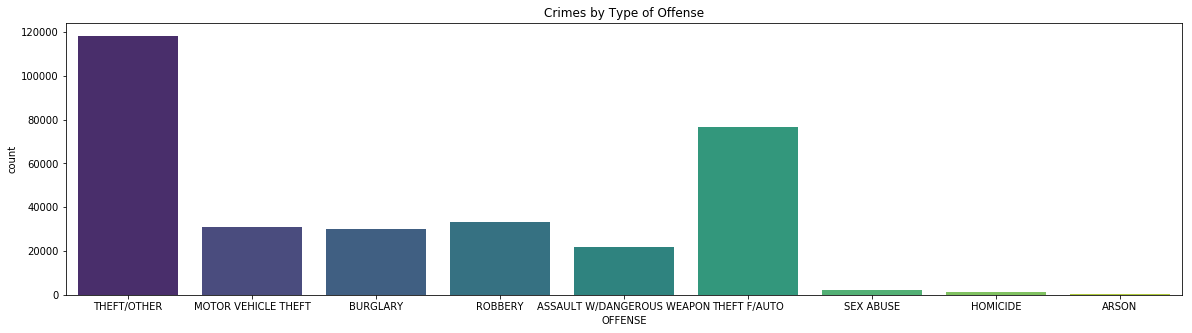

THEFT/OTHER                   118137
THEFT F/AUTO                   76656
ROBBERY                        33427
MOTOR VEHICLE THEFT            31148
BURGLARY                       30002
ASSAULT W/DANGEROUS WEAPON     21861
SEX ABUSE                       2149
HOMICIDE                        1138
ARSON                            322
Name: OFFENSE, dtype: int64

In [16]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Type of Offense")
sns.countplot(x='OFFENSE',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['OFFENSE'].value_counts()

### Crime by method

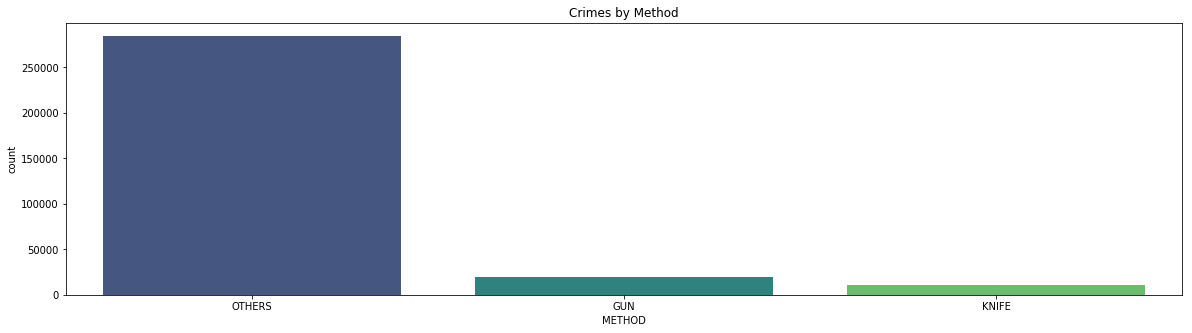

OTHERS    284621
GUN        19713
KNIFE      10506
Name: METHOD, dtype: int64

In [17]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Method")
sns.countplot(x='METHOD',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['METHOD'].value_counts()

### Crime by type of crime

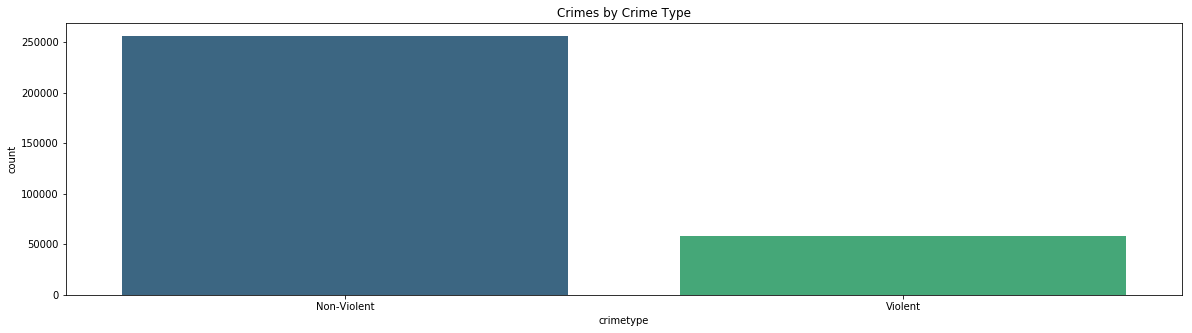

Non-Violent    256265
Violent         58575
Name: crimetype, dtype: int64

In [18]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Crime Type")
sns.countplot(x='crimetype',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['crimetype'].value_counts()

# Ask and Answer Analytic Questions

Using this data we can try to answer the following three questions:

* What is the overall trend of violent crime in Washington DC?
* Which areas in Washington DC have averaged most/least dangerous crimes over the years?
* Which areas are trending towards safer and which areas are becoming more dangerous over time

### What is the overall trend of crime in Washington DC?

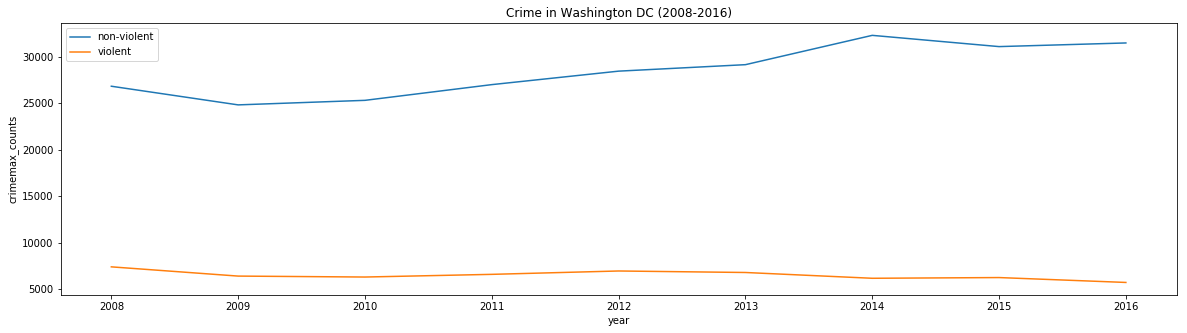

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861


In [31]:
plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('year')
plt.ylabel('crimemax_counts')
plt.title("Crime in Washington DC (2008-2016)")
plt.legend()
plt.show()
years

Looking at the graph, it appears non-violent crime has been generally increasing from 2008 to 2016. However, Violent-crime has remained rather steady.

In [21]:
delta_pct =  ((years.loc[years.year==2016, 'non_violent'].values[0] / years.loc[years.year==2008, 'non_violent'].values)[0] - 1)*100
print("From 2008 to 2016 non-violent crime in Washington DC has increased by " + str(round(delta_pct, 2)) + "%")

violent_delta_pct =  ((years.loc[years.year==2016, 'violent'].values[0] / years.loc[years.year==2008, 'violent'].values)[0] - 1)*100
print("From 2008 to 2016 violent crime in Washington DC has increased by " + str(round(violent_delta_pct, 2)) + "%")

From 2008 to 2016 non-violent crime in Washington DC has increased by 17.35%
From 2008 to 2016 violent crime in Washington DC has increased by -22.66%


While there appears to be a more drastic change in violent crime, the total amount of non-violent crime is much lager.  This means the percentage of violent crime will be much more sensitive to change.  

### Which areas in Washington DC have averaged most/least dangerous crimes over the years?

To look at total number of crimes in each  neighborhood we have to group the data by cluster and calculate the aggregate sum of crimes.

In [33]:
neigh_total = dc_crime_data.groupby(['cluster']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
neigh_total['pct_violent'] = neigh_total['violent'] / neigh_total['count']

<BarContainer object of 40 artists>

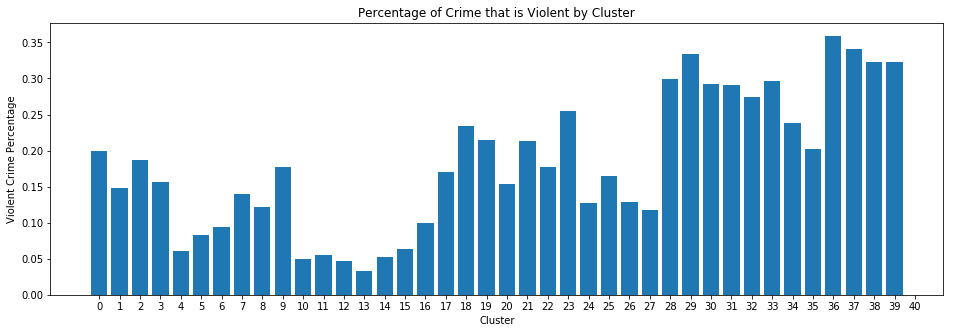

In [34]:
plt.figure(figsize=(16,5))
plt.xticks(np.arange(0, 41, 1))
plt.title("Percentage of Crime that is Violent by Cluster")
plt.xlabel('Cluster')
plt.ylabel('Violent Crime Percentage')
plt.bar(neigh_total.index,neigh_total.pct_violent )

Using this graph we can see which clusters have higher percentages of crime which are violent

In [24]:
neigh_total.sort_values('pct_violent',ascending=False).head(5)

,violent,non_violent,count,pct_violent
cluster,,,,
36,1226,2189,3415,0.359004
37,1593,3072,4665,0.341479
29,333,666,999,0.333333
38,2074,4352,6426,0.322751
39,4801,10092,14893,0.322366


If we sort the data by highest percentage of violent crimes, we see clusteres 36, 37, 29, 38, and 39 have the highest percentages

### Which areas are trending towards safer and which areas are becoming more dangerous over time.

To compare the data for each cluster from year to year, the data must be grouped by cluster and by year.

In [25]:
neigh_year = dc_crime_data.groupby(['cluster', 'year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
neigh_year['pct_violent'] = neigh_year['violent'] / neigh_year['count']
neigh_year.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster", "year": "year", "violent": "total_violent", "non_violent": "total_non_violent", "count": "total_count", "pct_violent": "pct_violent"}, inplace=True)
neigh_year.reset_index(inplace=True)

Now with the data grouped by cluster with the total crime for year, we can compare the crime from 2016 to the crime from 2008.

Then we group the data by cluster and include the data for increse in violent crime percentage frmo 2008 to 2016

In [26]:
neigh_year_avg = neigh_year.groupby(['cluster']).agg({'total_violent':'mean', 'total_non_violent':'mean', 'total_count':'mean'})
neigh_year_avg['pct_violent'] = neigh_year_avg['total_violent'] / neigh_year_avg['total_non_violent']
neigh_year_avg.rename(columns={"total_violent": "avg_violent", "total_non_violent": "avg_non_violent", "total_count": "avg_count", "pct_violent": "pct_violent"}, inplace=True)
neigh_year_avg.sort_values(by=['avg_count', 'avg_violent'], ascending=False)
neigh_year_avg.reset_index(inplace=True)

neigh_year_avg['violent_2016-2008'] = 0
for index, row in neigh_year_avg.iterrows():
    # find the neigh_year records for this cluster
    violent08 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2008)]['pct_violent']).values
    violent16 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2016)]['pct_violent']).values
    neigh_year_avg.loc[[index], ['violent_2016-2008']] = violent16 - violent08

### Top 5 Clusters with the Biggest Decrease in Percentage of Violent Crime

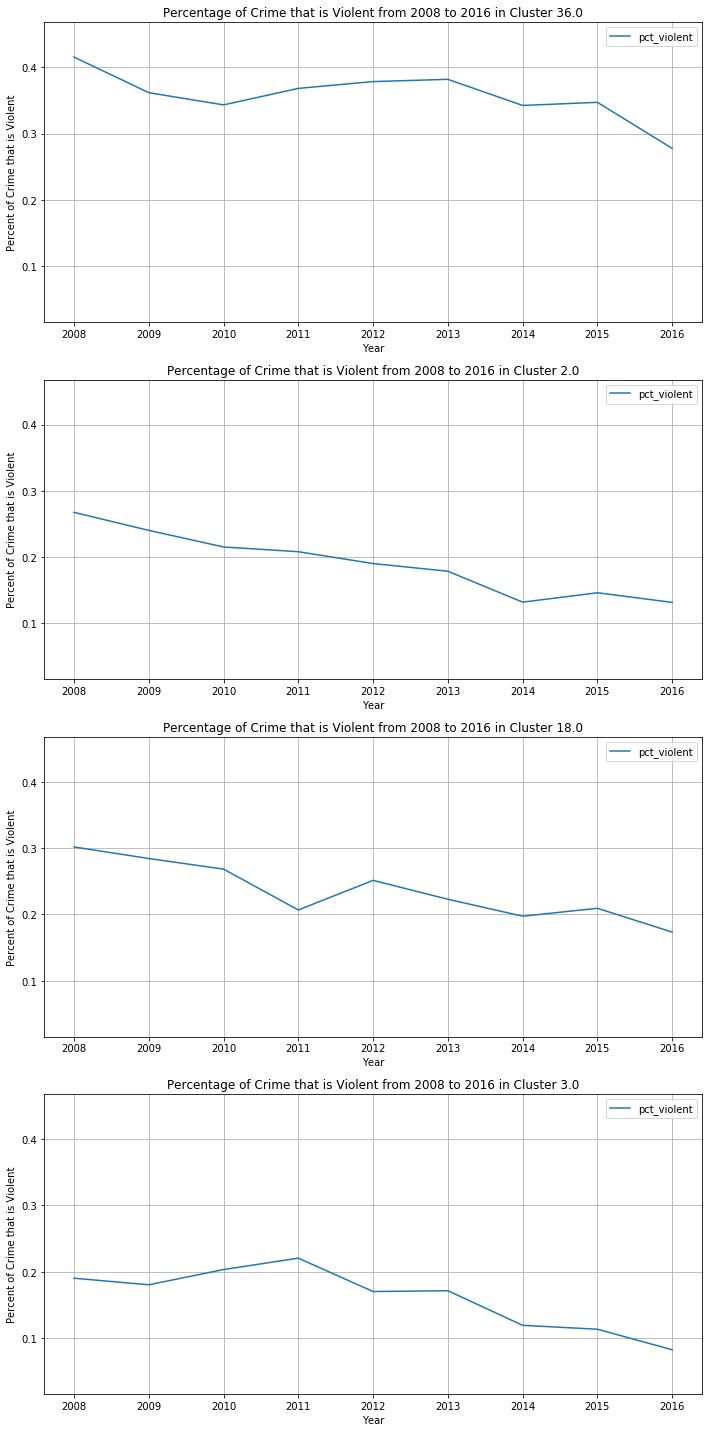

In [28]:
fig, axes = plt.subplots(5, 1, figsize=(10,20))

min_pct = (neigh_year['pct_violent'].min()*.95)
max_pct = (neigh_year['pct_violent'].max()*1.05)

rating = 0

for index, row in neigh_year_avg.sort_values(by=['violent_2016-2008'], ascending=True).head(5).iterrows():
    axes[rating].set_ylim([min_pct,max_pct])  
    axes[rating].set_xlabel('Year')
    axes[rating].set_ylabel('Percent of Crime that is Violent')
    title = ("Percentage of Crime that is Violent from 2008 to 2016 in Cluster " + str(row['cluster'])) 
    axes[rating].set_title(title)
    axes[rating].plot(neigh_year[neigh_year['cluster'] == row['cluster']]['year'], neigh_year[neigh_year['cluster'] == row['cluster']]['pct_violent'], label="pct_violent")
    axes[rating].legend()
    axes[rating].grid(True)
    rating = rating+1

plt.tight_layout()

### Top 5 Clusters with the Biggest Increase in Percentage of Violent Crimes

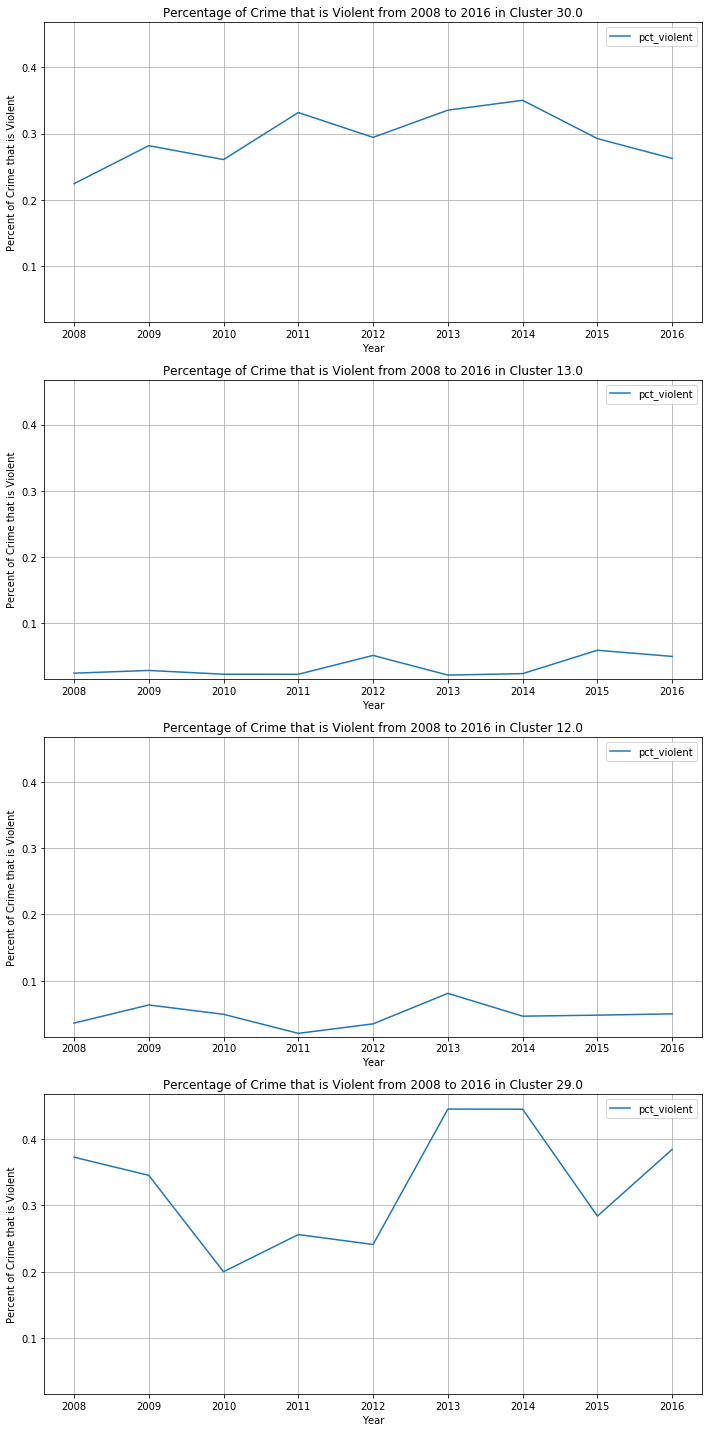

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(10,20))

rating = 0

for index, row in neigh_year_avg.sort_values(by=['violent_2016-2008'], ascending=False).head(4).iterrows():
    axes[rating].set_ylim([min_pct,max_pct])  
    axes[rating].set_xlabel('Year')
    axes[rating].set_ylabel('Percent of Crime that is Violent')
    title = ("Percentage of Crime that is Violent from 2008 to 2016 in Cluster " + str(row['cluster'])) 
    axes[rating].set_title(title)
    axes[rating].plot(neigh_year[neigh_year['cluster'] == row['cluster']]['year'], neigh_year[neigh_year['cluster'] == row['cluster']]['pct_violent'], label="pct_violent")
    axes[rating].legend()
    axes[rating].grid(True)
    rating = rating+1

plt.tight_layout()

# Propose Further Reasearch

Further data should be collected to merge neighbourhood population data with this crime data.  Right now we can only compare the number of crimes but not the percentage of crimes. While we can already determine how dangerous the crimes are in an area, we still can't determine how likely a dangerous crime is to occur.

Ideally, we count the number of crimes in each neighborhood.  Then we use the violent/non-violent crime data to assign weights to those neighbourhood crime numbers.  For instance, the total crimes for a neighborhood might be the number of non-violent crimes plus 1.25 times the number of violent crimes.  Then we divide that number by the total number of people in that area.  This way we can see how dangerous an area is, not just by looking at the likelihood of a crime but also considering that a violent crime is more dangerous than a non-violent crime.  

Finally, the data includes latitude and longitude coordinates of the crimes.  It would be nice to group these coordinates into areas about the size of a city block.  Then we can create a heatmap to overlay on top of a map of Washington DC.  This would make it the most easy to visualize where most of the crime was being committed.  
